In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,cohen_kappa_score
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.ensemble import GradientBoostingRegressor
# Install catboost if not already installed
!pip install catboost
from catboost import CatBoostRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.2 MB/s eta 0:00:00


In [ ]:
df=pd.read_csv('/content/application_record.csv')
df

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [ ]:
df1=pd.read_csv('/content/credit_record.csv')
df1

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


CLASSIFICATION DATA TO PREDICT CREDIT CARD APPROVAL OR NOT

In [ ]:
import pandas as pd
df2=pd.merge(df,df1,how='inner',on=['ID']) #JOINING 2 DATAFRAMES
df2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [ ]:
df2.isnull().sum()

,0
ID,0
CODE_GENDER,0
FLAG_OWN_CAR,0
FLAG_OWN_REALTY,0
CNT_CHILDREN,0
AMT_INCOME_TOTAL,0
NAME_INCOME_TYPE,0
NAME_EDUCATION_TYPE,0
NAME_FAMILY_STATUS,0
NAME_HOUSING_TYPE,0


In [ ]:
df2.duplicated().sum()

np.int64(0)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  object 
 2   FLAG_OWN_CAR         777715 non-null  object 
 3   FLAG_OWN_REALTY      777715 non-null  object 
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  object 
 7   NAME_EDUCATION_TYPE  777715 non-null  object 
 8   NAME_FAMILY_STATUS   777715 non-null  object 
 9   NAME_HOUSING_TYPE    777715 non-null  object 
 10  DAYS_BIRTH           777715 non-null  int64  
 11  DAYS_EMPLOYED        777715 non-null  int64  
 12  FLAG_MOBIL           777715 non-null  int64  
 13  FLAG_WORK_PHONE      777715 non-null  int64  
 14  FLAG_PHONE           777715 non-null  int64  
 15  FLAG_EMAIL       

In [ ]:
#fill missing values
df2['OCCUPATION_TYPE'].fillna(value='other',inplace=True)
df2

<ipython-input-12-5c5567120f75>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['OCCUPATION_TYPE'].fillna(value='other',inplace=True)


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,0,C
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-1,C
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-2,C
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-3,C
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-4,C
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,2
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [ ]:
df2['STATUS'].unique()

array(['C', '1', '0', 'X', '5', '4', '3', '2'], dtype=object)

In [ ]:
df2.columns

Index(['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS'],
      dtype='object')

In [ ]:
#invalid data  present in the dataset like ?,? use for loop to replace the values.
for col in df2[['ID', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN',
       'AMT_INCOME_TOTAL', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE',
       'STATUS']]:
       print(f'unique values in columns {col}: {df2[col].unique()}')

unique values in columns ID: [5008804 5008805 5008806 ... 5149838 5150049 5150337]
unique values in columns CODE_GENDER: ['M' 'F']
unique values in columns FLAG_OWN_CAR: ['Y' 'N']
unique values in columns FLAG_OWN_REALTY: ['Y' 'N']
unique values in columns CNT_CHILDREN: [ 0  1  3  2  4  5 14 19  7]
unique values in columns AMT_INCOME_TOTAL: [ 427500.   112500.   270000.   283500.   135000.   130500.   157500.
  405000.   211500.   360000.   126000.   315000.   247500.   297000.
  225000.   166500.   216000.   255150.   148500.   202500.    94500.
  450000.   180000.    90000.   765000.   382500.   144000.   229500.
  292500.    74250.    40500.   337500.   193500.   267750.   139500.
   67500.   252000.   900000.   115290.   279000.    76500.   234000.
   81000.   108000.    99000.   198000.    45000.   238500.   117000.
  153000.  1350000.   445500.   495000.    85500.   306000.   562500.
  189000.   328500.   310500.   540000.   171000.   675000.   121500.
   72000.    65250.   18450

filling status o,1 as it is classification

In [ ]:
#in status it is categorical and numeric so we are changing data type
df2['STATUS'].replace('X',0,inplace=True)
df2['STATUS'].replace('C',0,inplace=True)
df2['STATUS']=df2['STATUS'].astype(int)
df2.loc[df2['STATUS']>1,'STATUS']=1


<ipython-input-16-1059135438c4>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df2['STATUS'].replace('X',0,inplace=True)
<ipython-input-16-1059135438c4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.m

In [ ]:
df2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-1,0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-2,0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-3,0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,other,2.0,-4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-9,0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-10,1
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-11,1
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,-9188,-1193,1,0,0,0,Laborers,1.0,-12,0


In [ ]:
df2['STATUS'].value_counts()

,count
STATUS,
0,766140
1,11575


In [ ]:
df2['AGE_YEARS']=round(-df2['DAYS_BIRTH']/365,0) #change - values into + and 0-used for round off values no decimal
df2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,AGE_YEARS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,other,2.0,0,0,33.0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,other,2.0,-1,0,33.0
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,other,2.0,-2,0,33.0
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,other,2.0,-3,0,33.0
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,other,2.0,-4,0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-9,0,25.0
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-10,1,25.0
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-11,1,25.0
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,-1193,1,0,0,0,Laborers,1.0,-12,0,25.0


In [ ]:
df2['years_employed']=round(-df2['DAYS_EMPLOYED']/365,0)
df2.loc[df2['years_employed']<0,'years_employed']=0 #some values will have negatives so changing to positive <0 all values becomes 0

In [ ]:
df2['MONTHS_BALANCE1']=round(-df2['MONTHS_BALANCE'],0)
df2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,AGE_YEARS,years_employed,MONTHS_BALANCE1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,0,0,33.0,12.0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,-1,0,33.0,12.0,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,-2,0,33.0,12.0,2
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,-3,0,33.0,12.0,3
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,1,0,0,other,2.0,-4,0,33.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-9,0,25.0,3.0,9
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-10,1,25.0,3.0,10
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-11,1,25.0,3.0,11
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,...,0,0,0,Laborers,1.0,-12,0,25.0,3.0,12


In [ ]:
df2.drop(['DAYS_BIRTH','DAYS_EMPLOYED','MONTHS_BALANCE'],axis=1,inplace=True)


In [ ]:
df2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,AGE_YEARS,years_employed,MONTHS_BALANCE1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,other,2.0,0,33.0,12.0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,other,2.0,0,33.0,12.0,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,other,2.0,0,33.0,12.0,2
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,other,2.0,0,33.0,12.0,3
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,other,2.0,0,33.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,0,25.0,3.0,9
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,1,25.0,3.0,10
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,1,25.0,3.0,11
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,1,0,0,0,Laborers,1.0,0,25.0,3.0,12


DROPPING UNWANTED COLUMNS

In [ ]:
df2.drop(['FLAG_MOBIL','FLAG_WORK_PHONE','FLAG_PHONE','FLAG_EMAIL'],axis=1,inplace=True)

In [ ]:
df2

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,CNT_FAM_MEMBERS,STATUS,AGE_YEARS,years_employed,MONTHS_BALANCE1
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,0
1,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,1
2,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,2
3,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,3
4,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,other,2.0,0,33.0,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
777710,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,0,25.0,3.0,9
777711,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,1,25.0,3.0,10
777712,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,1,25.0,3.0,11
777713,5150337,M,N,Y,0,112500.0,Working,Secondary / secondary special,Single / not married,Rented apartment,Laborers,1.0,0,25.0,3.0,12


In [ ]:
a=[1,2,3,4,5]
for i,v in enumerate(a):
  print(i,v)

0 1
1 2
2 3
3 4
4 5


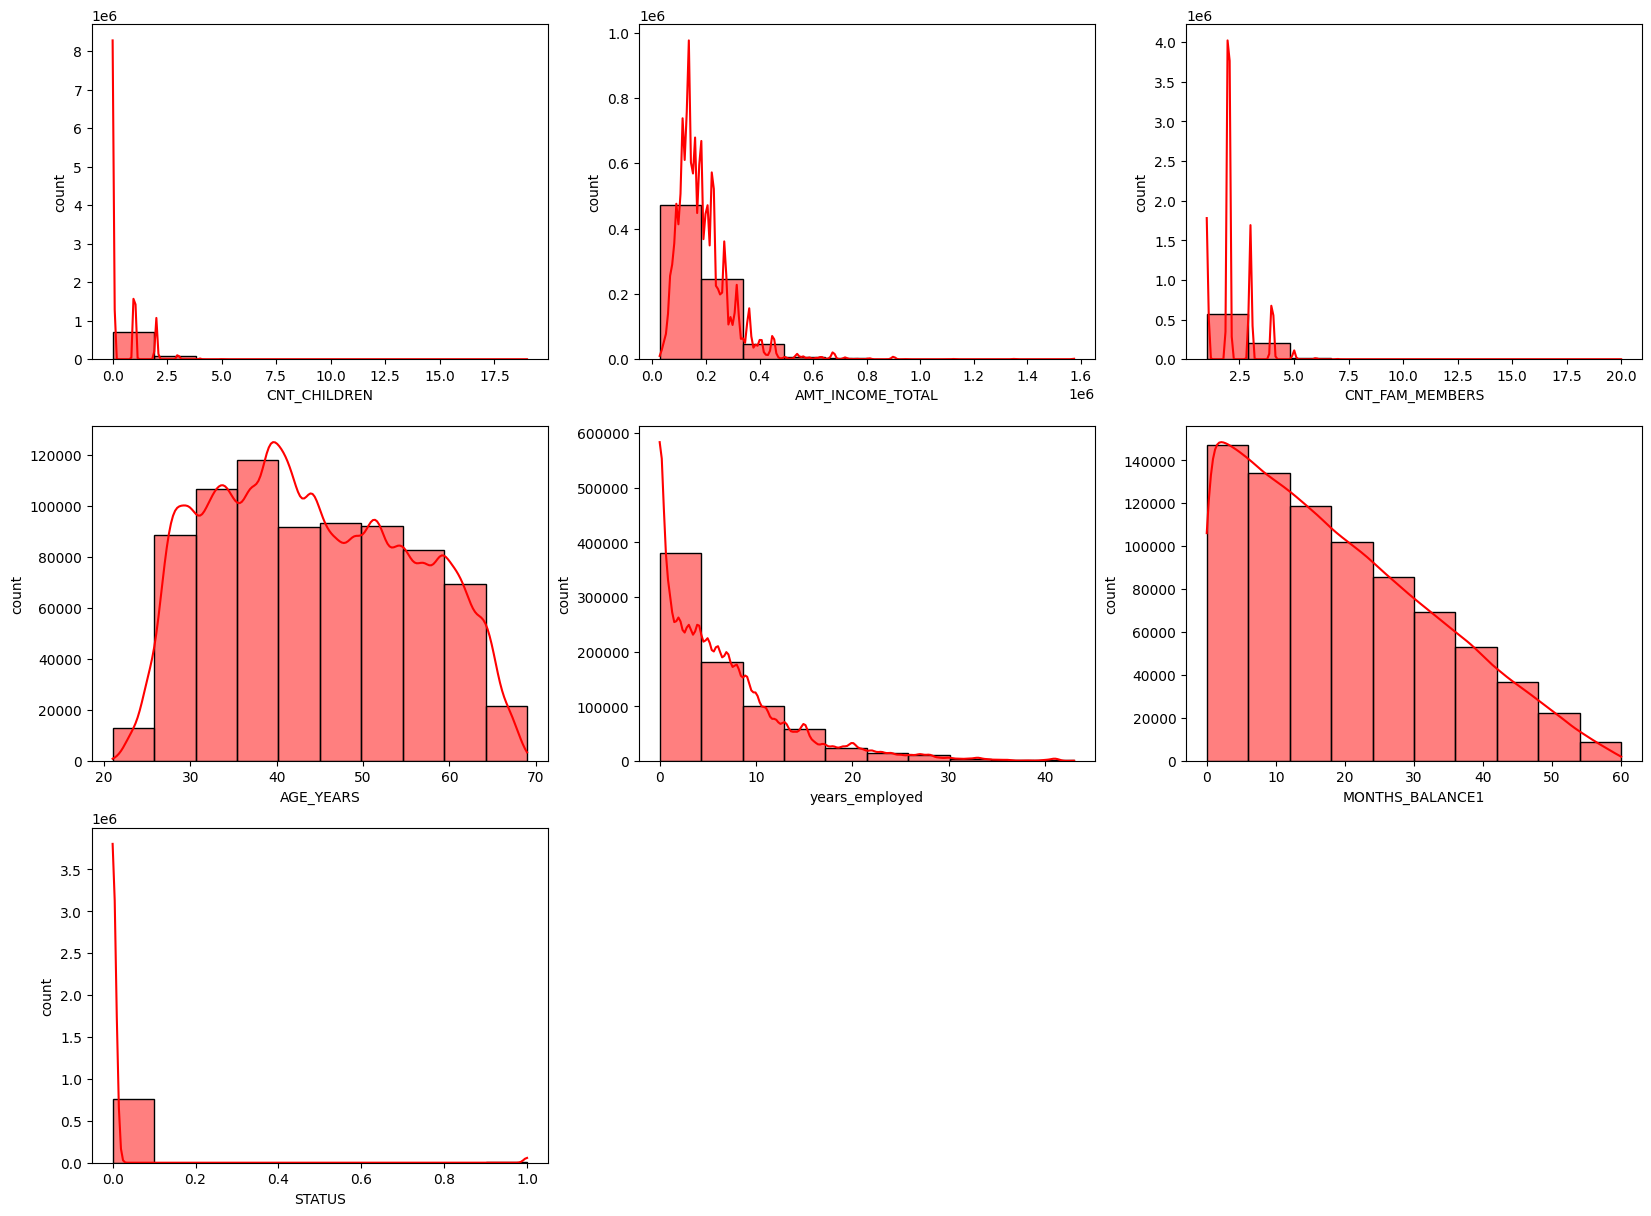

In [ ]:
#checking the countplot
num=['CNT_CHILDREN','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','AGE_YEARS','years_employed','MONTHS_BALANCE1','STATUS']
plt.figure(figsize=(20,20))
for i,col in enumerate(num,1):
  plt.subplot(4,3,i)
  sns.histplot(data=df2,kde=True,x=col,bins=10,color='red')
  plt.xlabel(col)
  plt.ylabel('count')

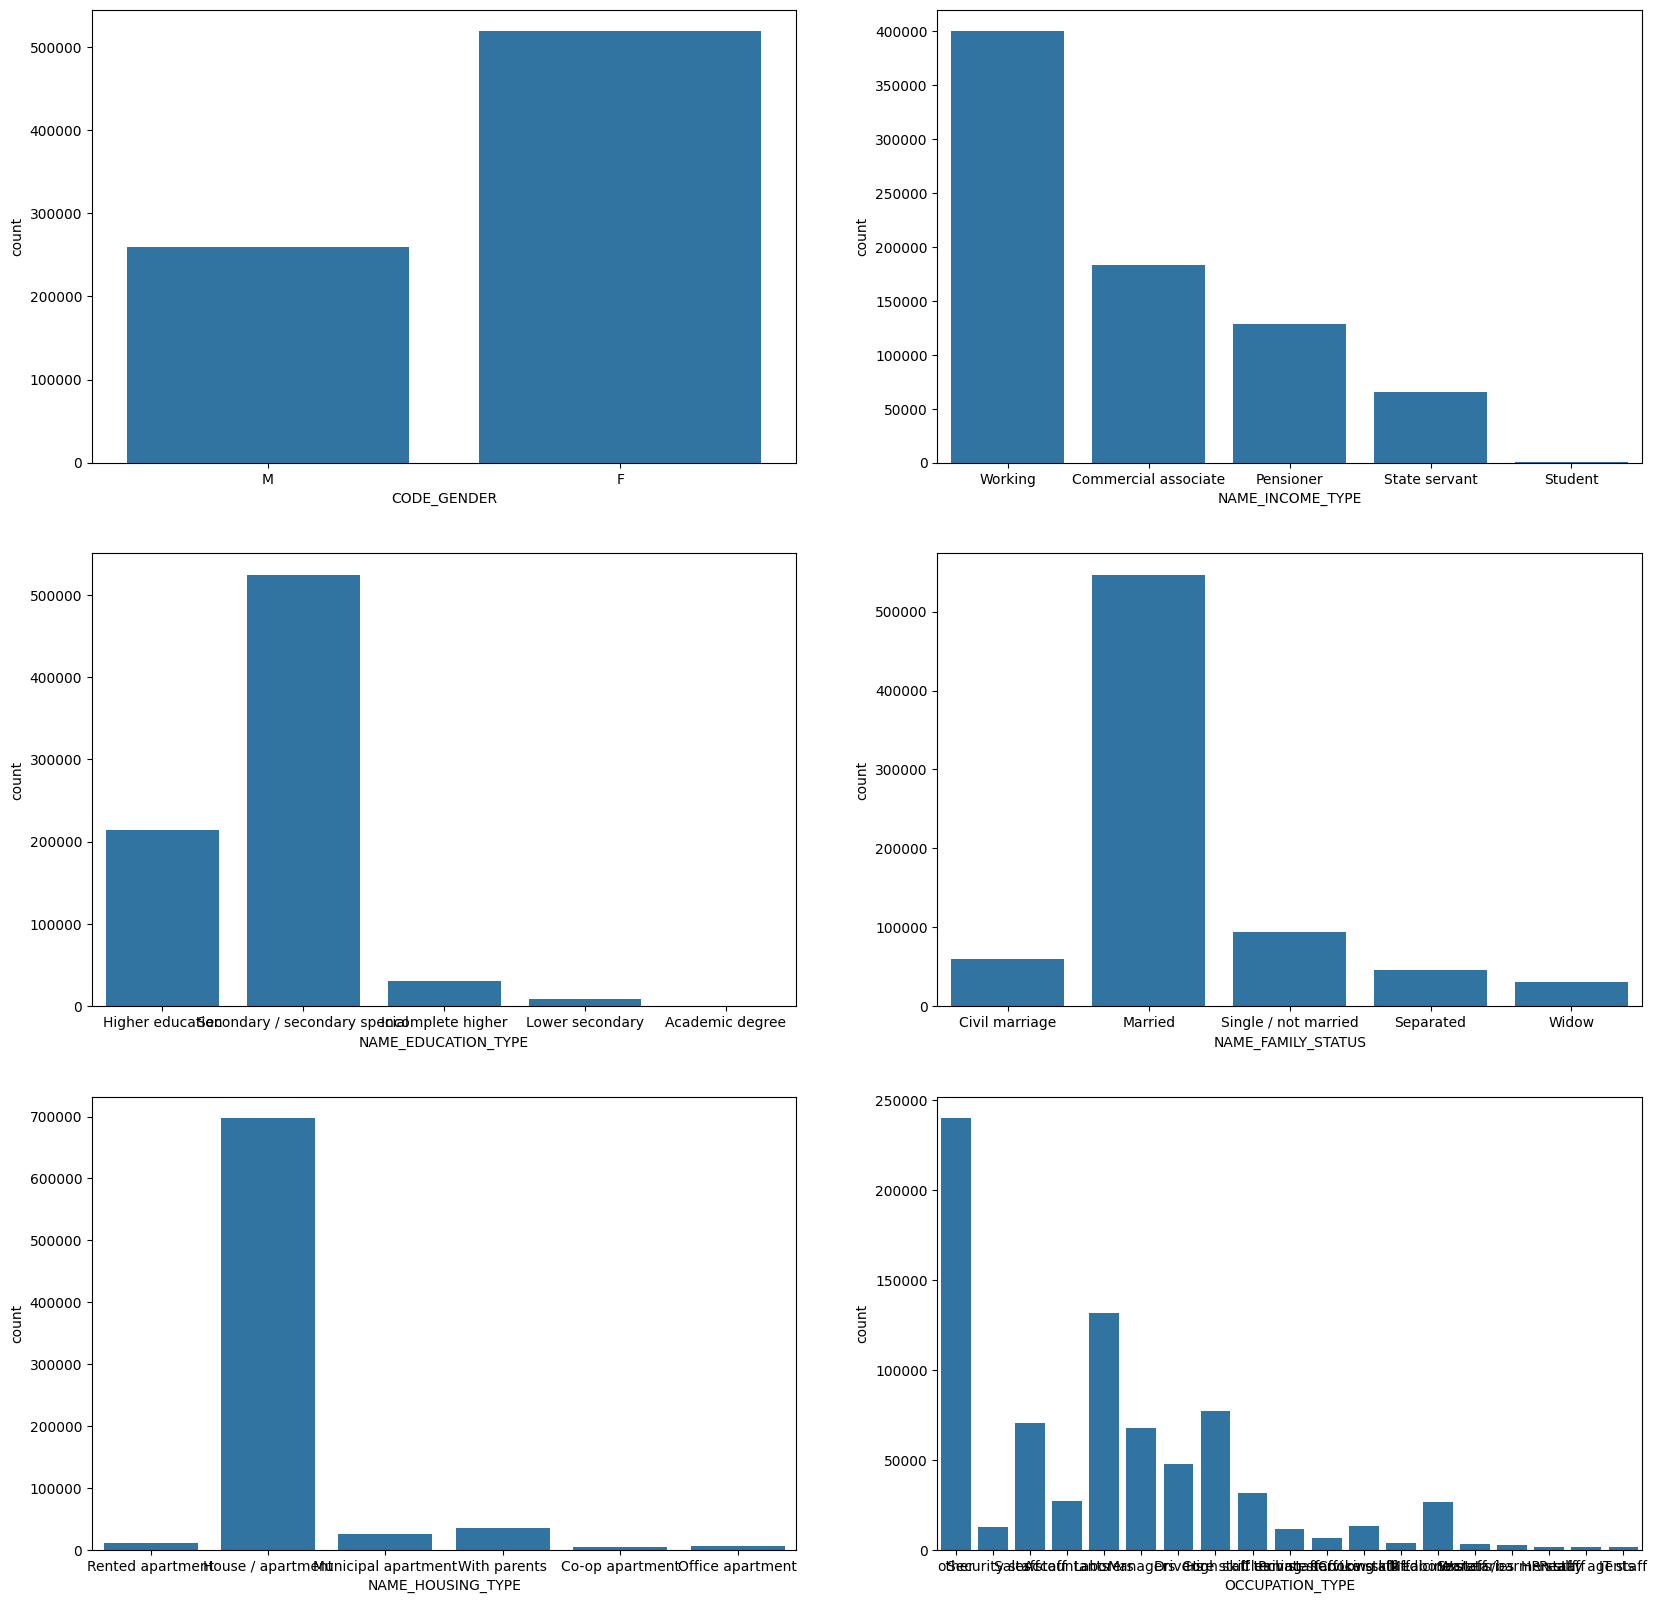

In [ ]:
cat=['CODE_GENDER','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','OCCUPATION_TYPE'] # Removed the trailing tab character from 'OCCUPATION_TYPE'
plt.figure(figsize=(20,20))
for i,col in enumerate(cat,1):
  plt.subplot(3,2,i)
  sns.countplot(data=df2,x=col)#frequency distribution chk
  plt.xlabel(col)
  plt.ylabel('count')

<Axes: >

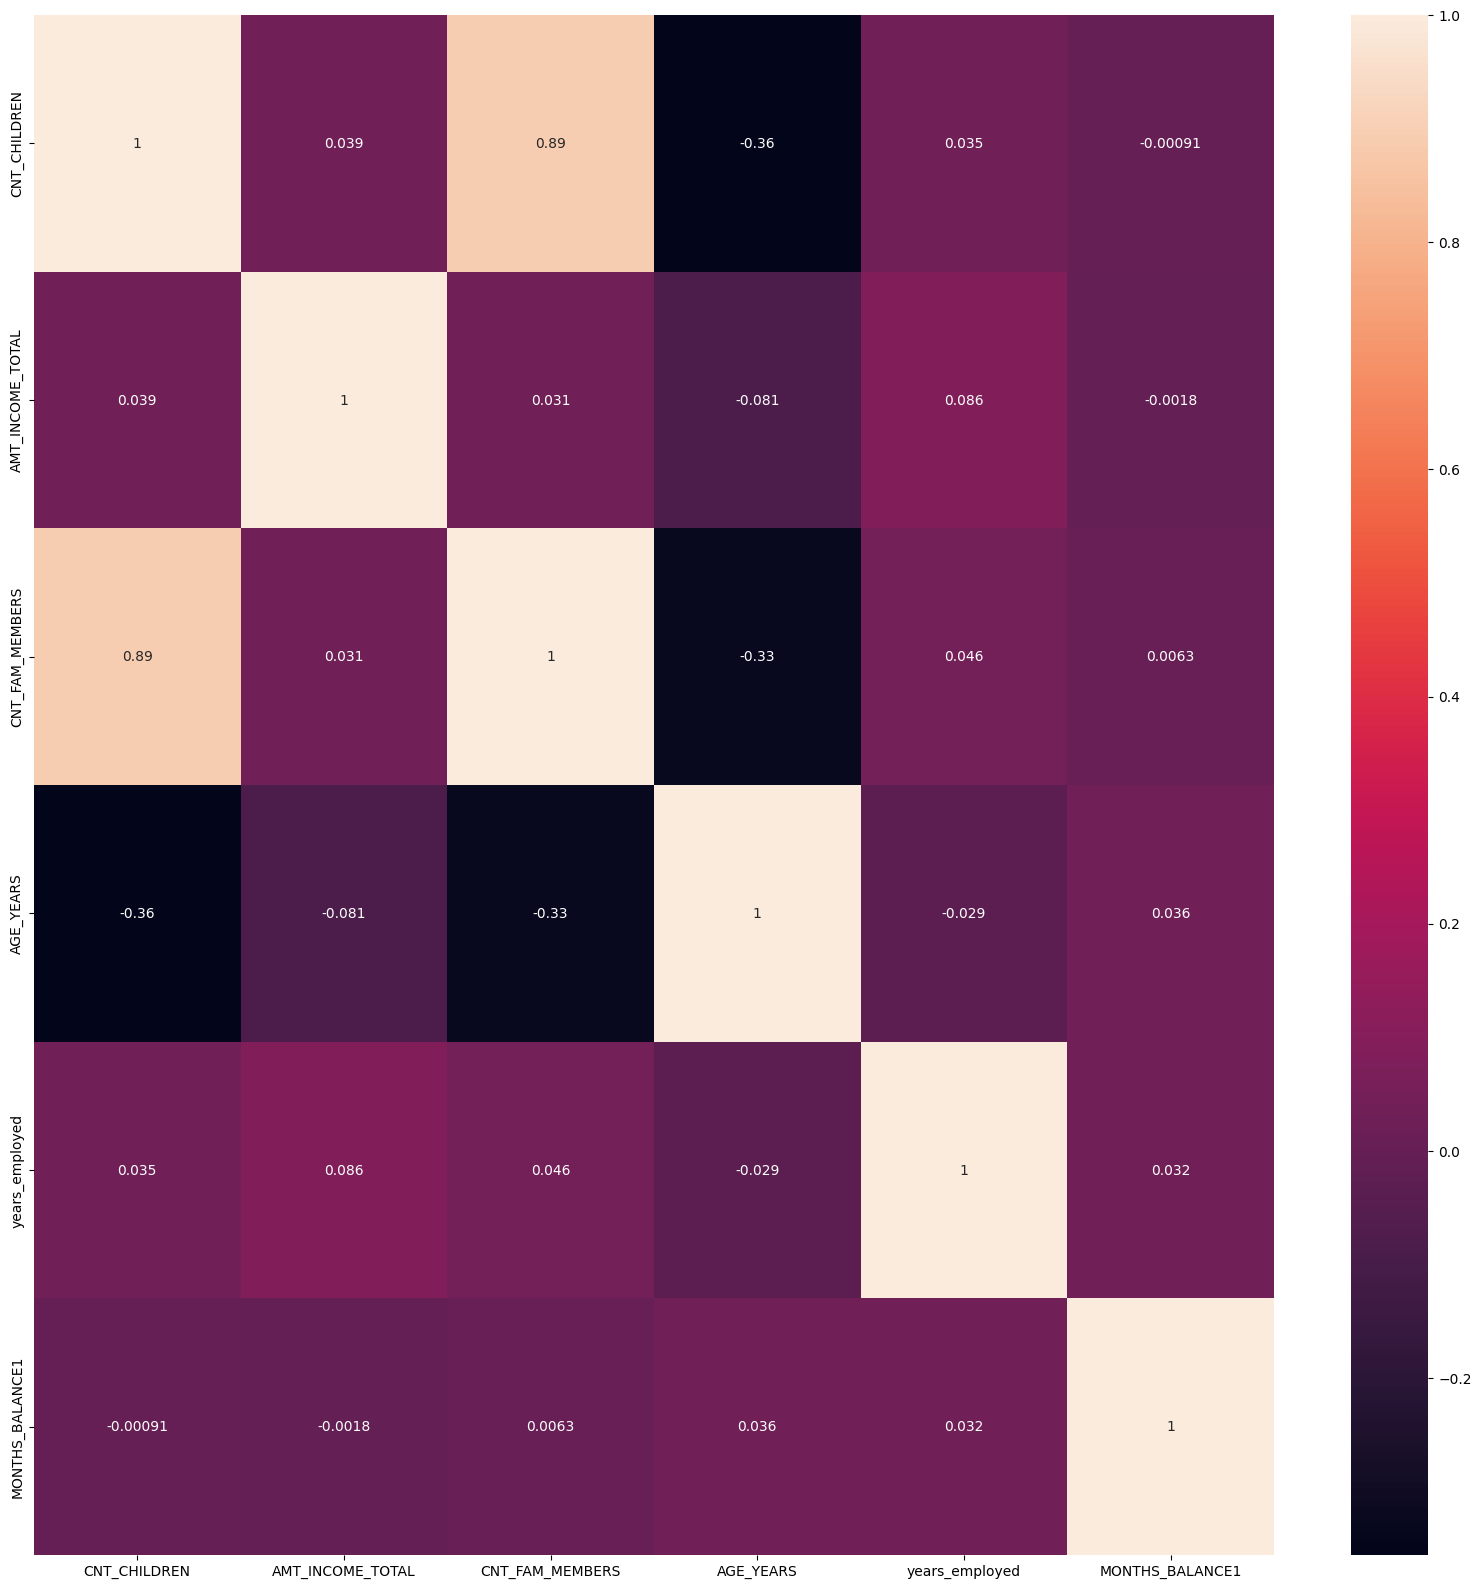

In [ ]:
#checking correlation for col are highly correlated
num=df2[['CNT_CHILDREN','AMT_INCOME_TOTAL','CNT_FAM_MEMBERS','AGE_YEARS','years_employed','MONTHS_BALANCE1']]
plt.figure(figsize=(20,20))
sns.heatmap(num.corr(),annot=True)


In [ ]:
#loop through all the columns in dataframe and apply labelencoding to categorical column
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
for column in df2.select_dtypes(include=['object']).columns:
  df2[column]=label_encoder.fit_transform(df2[column]) #FIT-PREPROCESS ,TRANSFORM-VALUES CHANGE AAGUM
df2.info() #display the dataframe with encoded columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777715 entries, 0 to 777714
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   777715 non-null  int64  
 1   CODE_GENDER          777715 non-null  int64  
 2   FLAG_OWN_CAR         777715 non-null  int64  
 3   FLAG_OWN_REALTY      777715 non-null  int64  
 4   CNT_CHILDREN         777715 non-null  int64  
 5   AMT_INCOME_TOTAL     777715 non-null  float64
 6   NAME_INCOME_TYPE     777715 non-null  int64  
 7   NAME_EDUCATION_TYPE  777715 non-null  int64  
 8   NAME_FAMILY_STATUS   777715 non-null  int64  
 9   NAME_HOUSING_TYPE    777715 non-null  int64  
 10  OCCUPATION_TYPE      777715 non-null  int64  
 11  CNT_FAM_MEMBERS      777715 non-null  float64
 12  STATUS               777715 non-null  int64  
 13  AGE_YEARS            777715 non-null  float64
 14  years_employed       777715 non-null  float64
 15  MONTHS_BALANCE1  

APPLYING ALL CLASSIFICATION ALGO

In [ ]:
#Splitting the dataset into training and testing sets
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
x=df2.drop("STATUS",axis=1)
y=df2["STATUS"]
x_train,x_test, y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)
#step 3: Training Logistic Regression Model
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
#step 4: Model Evaluation
y_pred1=logreg.predict(x_test)
y_pred1


array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
confusion_mat=confusion_matrix(y_test,y_pred1) # Changed y_predict to y_pred
print("confusion Matrix:\n",confusion_mat)
accuracy=accuracy_score(y_test,y_pred1) # Changed y_predict to y_pred
print("accuracy:",accuracy)
classification_rep=classification_report(y_test,y_pred1) # Changed y_predict to y_pred
print("classification rep:\n",classification_rep)
kappa_score=cohen_kappa_score(y_test,y_pred1)
print('kappa_score:\n',kappa_score)
#macro is maximum value

confusion Matrix:
 [[153258      0]
 [  2285      0]]
accuracy: 0.9853095285548048
classification rep:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    153258
           1       0.00      0.00      0.00      2285

    accuracy                           0.99    155543
   macro avg       0.49      0.50      0.50    155543
weighted avg       0.97      0.99      0.98    155543

kappa_score:
 0.0


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
df_gini = DecisionTreeClassifier()
df_gini.fit(x_train,y_train)
y_pred_gini=df_gini.predict(x_test)
print(y_pred_gini)


[0 0 0 ... 0 0 0]


In [ ]:
confusion_mat=confusion_matrix(y_test,y_pred_gini) # Changed y_predict to y_pred
print("confusion Matrix:\n",confusion_mat)
accuracy=accuracy_score(y_test,y_pred_gini) # Changed y_predict to y_pred
print("accuracy:",accuracy)
classification_rep=classification_report(y_test,y_pred_gini) # Changed y_predict to y_pred
print("classification rep:\n",classification_rep)
kappa_score=cohen_kappa_score(y_test,y_pred_gini)
print('kappa_score:\n',kappa_score)

confusion Matrix:
 [[151871   1387]
 [  1259   1026]]
accuracy: 0.9829886269391743
classification rep:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    153258
           1       0.43      0.45      0.44      2285

    accuracy                           0.98    155543
   macro avg       0.71      0.72      0.71    155543
weighted avg       0.98      0.98      0.98    155543

kappa_score:
 0.4281520097541466


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
#step 4: Model Evaluation
y_pred=rfc.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
confusion_mat=confusion_matrix(y_test,y_pred) # Changed y_predict to y_pred
print("confusion Matrix:\n",confusion_mat)
accuracy=accuracy_score(y_test,y_pred) # Changed y_predict to y_pred
print("accuracy:",accuracy)
classification_rep=classification_report(y_test,y_pred) # Changed y_predict to y_pred
print("classification rep:\n",classification_rep)
kappa_score=cohen_kappa_score(y_test,y_pred)
print('kappa_score:\n',kappa_score)

confusion Matrix:
 [[152576    682]
 [  1375    910]]
accuracy: 0.9867753611541503
classification rep:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    153258
           1       0.57      0.40      0.47      2285

    accuracy                           0.99    155543
   macro avg       0.78      0.70      0.73    155543
weighted avg       0.98      0.99      0.99    155543

kappa_score:
 0.4629559071393968


APPLYING GRADIENT BOOSTING

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gradient_boosting=GradientBoostingClassifier()
gradient_boosting.fit(x_train,y_train)
gradient_predictions=gradient_boosting.predict(x_test)
gradient_predictions

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
confusion_mat=confusion_matrix(y_test,gradient_predictions) # Changed y_predict to y_pred
print("confusion Matrix:\n",confusion_mat)
accuracy=accuracy_score(y_test,gradient_predictions) # Changed y_predict to y_pred
print("accuracy:",accuracy)
classification_rep=classification_report(y_test,gradient_predictions) # Changed y_predict to y_pred
print("classification rep:\n",classification_rep)
kappa_score=cohen_kappa_score(y_test,gradient_predictions)
print('kappa_score:\n',kappa_score)

confusion Matrix:
 [[153256      2]
 [  2280      5]]
accuracy: 0.9853288158258487
classification rep:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99    153258
           1       0.71      0.00      0.00      2285

    accuracy                           0.99    155543
   macro avg       0.85      0.50      0.50    155543
weighted avg       0.98      0.99      0.98    155543

kappa_score:
 0.0042736528566409415


APPLYING SMOTE TO BALANCE DATA AND DO ALL THE CLASS ALGO

In [ ]:
from imblearn.over_sampling import SMOTE
x=df2.drop("STATUS",axis=1)
y=df2["STATUS"]
smote=SMOTE()
x1,y1=smote.fit_resample(x,y)
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.2,random_state=42)
logreg=LogisticRegression()
logreg.fit(x_train,y_train)
#step 4: Model Evaluation
y_pred2=logreg.predict(x_test)
y_pred2


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
confusion_mat2=confusion_matrix(y_test,y_pred2) # Changed y_predict to y_pred
print("confusion Matrix:\n",confusion_mat2)
accuracy2=accuracy_score(y_test,y_pred2) # Changed y_predict to y_pred
print("accuracy:",accuracy2)
classification_rep2=classification_report(y_test,y_pred2) # Changed y_predict to y_pred
print("classification rep:\n",classification_rep2)
kappa_score2=cohen_kappa_score(y_test,y_pred2)
print('kappa_score:\n',kappa_score2)

confusion Matrix:
 [[79749 73165]
 [67247 86295]]
accuracy: 0.5418200328921607
classification rep:
               precision    recall  f1-score   support

           0       0.54      0.52      0.53    152914
           1       0.54      0.56      0.55    153542

    accuracy                           0.54    306456
   macro avg       0.54      0.54      0.54    306456
weighted avg       0.54      0.54      0.54    306456

kappa_score:
 0.08356368517528667


In [ ]:
from sklearn.tree import DecisionTreeClassifier
df_gini1 = DecisionTreeClassifier()
df_gini1.fit(x_train,y_train)
y_pred_gini1=df_gini1.predict(x_test)
print(y_pred_gini)

[0 0 0 ... 0 0 0]


In [ ]:
confusion_mat=confusion_matrix(y_test,y_pred_gini1) # Changed y_predict to y_pred
print("confusion Matrix:\n",confusion_mat)
accuracy=accuracy_score(y_test,y_pred_gini1) # Changed y_predict to y_pred
print("accuracy:",accuracy)
classification_rep=classification_report(y_test,y_pred_gini1) # Changed y_predict to y_pred
print("classification rep:\n",classification_rep)
kappa_score=cohen_kappa_score(y_test,y_pred_gini1)
print('kappa_score:\n',kappa_score)

confusion Matrix:
 [[147629   5285]
 [  2802 150740]]
accuracy: 0.9736112198814838
classification rep:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97    152914
           1       0.97      0.98      0.97    153542

    accuracy                           0.97    306456
   macro avg       0.97      0.97      0.97    306456
weighted avg       0.97      0.97      0.97    306456

kappa_score:
 0.9472204654708836


In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier()
rfc1.fit(x_train,y_train)
#step 4: Model Evaluation
y_pred2=rfc1.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
confusion_mat=confusion_matrix(y_test,y_pred2) # Changed y_predict to y_pred
print("confusion Matrix:\n",confusion_mat)
accuracy=accuracy_score(y_test,y_pred2) # Changed y_predict to y_pred
print("accuracy:",accuracy)
classification_rep=classification_report(y_test,y_pred2) # Changed y_predict to y_pred
print("classification rep:\n",classification_rep)
kappa_score=cohen_kappa_score(y_test,y_pred2)
print('kappa_score:\n',kappa_score)

confusion Matrix:
 [[147736   5178]
 [  1747 151795]]
accuracy: 0.9774029550734853
classification rep:
               precision    recall  f1-score   support

           0       0.99      0.97      0.98    152914
           1       0.97      0.99      0.98    153542

    accuracy                           0.98    306456
   macro avg       0.98      0.98      0.98    306456
weighted avg       0.98      0.98      0.98    306456

kappa_score:
 0.9548036465005008


RANDOM OVER SAMPLER FOR BALANCING DATA SAME LIKE SMOTE

In [ ]:
from imblearn.over_sampling import RandomOverSampler
r=RandomOverSampler(random_state=42)
x_r,y_r=r.fit_resample(x,y)
unique,counts=np.unique(y_r,return_counts=True)
print(dict(zip(unique,counts)))

{np.int64(0): np.int64(766140), np.int64(1): np.int64(766140)}


splitting data

In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x_r,y_r,train_size)